In [1]:
# importing modules 
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder 

In [4]:
data = pd.read_csv('1ws.csv') 
print("Data Shape:", data.shape) 

Data Shape: (355, 12)


In [5]:
print(data.head()) 

   EpmployeeId Canteen Lift_H  Shift_H  Lift  Canteen_H  Parking  Cubicle  \
0            0      C1     L3        1     2          4        1        8   
1            1      C1     L3        1     2          4        2        5   
2            2      C1     L4        1     2          4        2        5   
3            4      C1     L4        1     4          4        1        6   
4            5      C1     L4        1     2          4        2        6   

  Parking_H  Floor_H Zone_H  Rating  
0        P2        2      A     4.5  
1        P2        2      A     4.5  
2        P2        1      B     4.4  
3        P2        2      B     4.3  
4        P2        1      B     4.4  


In [50]:
# Feature Matrix 
x_orig = data.iloc[:, 1:-1].values 
# Data labels 
y_label = data.iloc[:, -1:].values 
print("Shape of Feature Matrix:", x_orig.shape) 
print("Shape Label Vector:", y_label.shape) 

Shape of Feature Matrix: (355, 10)
Shape Label Vector: (355, 1)


In [52]:
# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_label[i] > 4]) 
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_label[i] <= 4])

In [53]:
y_orig = (y_label > 4).astype(int)

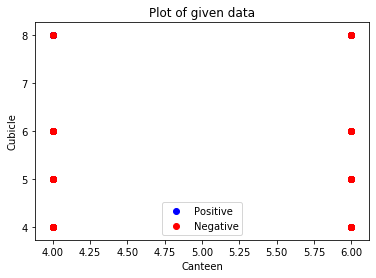

In [54]:
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 4], x_pos[:, 6], color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 4], x_neg[:, 6], color = 'red', label = 'Negative') 
  
plt.xlabel('Canteen') 
plt.ylabel('Cubicle') 
plt.title('Plot of given data') 
plt.legend() 
  
plt.show() 

In [55]:
# Creating the One Hot Encoder 
oneHot = OneHotEncoder() 
  
# Encoding x_orig 
oneHot.fit(x_orig) 
x = oneHot.transform(x_orig).toarray() 
  
# Encoding y_orig 
oneHot.fit(y_orig) 
y = oneHot.transform(y_orig).toarray() 
  
alpha, epochs = 0.0035, 500
m, n = x.shape 
print('m =', m) 
print('n =', n) 
print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs) 

m = 355
n = 32
Learning Rate = 0.0035
Number of Epochs = 500


In [56]:
y.shape 

(355, 2)

In [57]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [58]:
# There are n columns in the feature matrix 
# after One Hot Encoding. 
X = tf.placeholder(tf.float32, [None, n]) 
  
# Since this is a binary classification problem, 
# Y can take only 2 values. 
Y = tf.placeholder(tf.float32, [None, 2]) 
  
# Trainable Variable Weights 
W = tf.Variable(tf.zeros([n, 2])) 
  
# Trainable Variable Bias 
b = tf.Variable(tf.zeros([2])) 

In [59]:
# Hypothesis 
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 
  
# Sigmoid Cross Entropy Cost Function 
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
                    logits = Y_hat, labels = Y) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer( 
         learning_rate = alpha).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [60]:

# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Lists for storing the changing Cost and Accuracy in every Epoch 
    cost_history, accuracy_history = [], [] 
      
    # Iterating through all the epochs 
    for epoch in range(epochs): 
        cost_per_epoch = 0
          
        # Running the Optimizer 
        sess.run(optimizer, feed_dict = {X : x, Y : y}) 
          
        # Calculating cost on current Epoch 
        c = sess.run(cost, feed_dict = {X : x, Y : y}) 
          
        # Calculating accuracy on current Epoch 
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                          tf.argmax(Y, 1)) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                                 tf.float32)) 
          
        # Storing Cost and Accuracy to the history 
        cost_history.append(sum(sum(c))) 
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
          
        # Displaying result on current Epoch 
        if epoch % 100 == 0 and epoch != 0: 
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1])) 
      
    Weight = sess.run(W) # Optimized Weight 
    Bias = sess.run(b)   # Optimized Bias 
      
    # Final Accuracy 
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                      tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,  
                                             tf.float32)) 
    print("\nAccuracy:", accuracy_history[-1], "%") 

Epoch 100 Cost: 452.9573974609375
Epoch 200 Cost: 448.0070495605469
Epoch 300 Cost: 445.7212677001953
Epoch 400 Cost: 444.31239318847656

Accuracy: 72.39436507225037 %


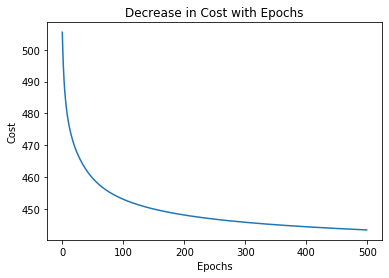

In [61]:

plt.plot(list(range(epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
  
plt.show() 

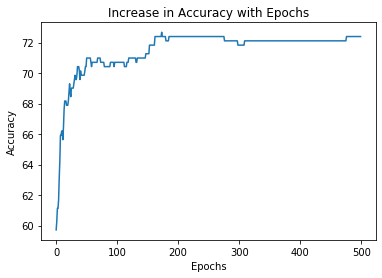

In [62]:
plt.plot(list(range(epochs)), accuracy_history) 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Increase in Accuracy with Epochs') 
  
plt.show() 

In [64]:
Weight.shape

(32, 2)

In [73]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [87]:
np.dot(Weight.T,x[277]) + Bias

array([-0.19747755, -2.03799121])

In [88]:
y_sig = sigmoid(np.dot(Weight.T,x[277]) + Bias)

In [89]:
np.argmax(y_sig) 

0

In [86]:
y_orig[277]

array([0])